In [2]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd .read_csv("netflix_titles.csv")

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [9]:
df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'x',inplace  = True)
df['director'].replace(np.nan, 'y',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [10]:
netflix_shows=df[df['type']=='TV Show']

In [11]:
netflix_movies=df[df['type']=='Movie']

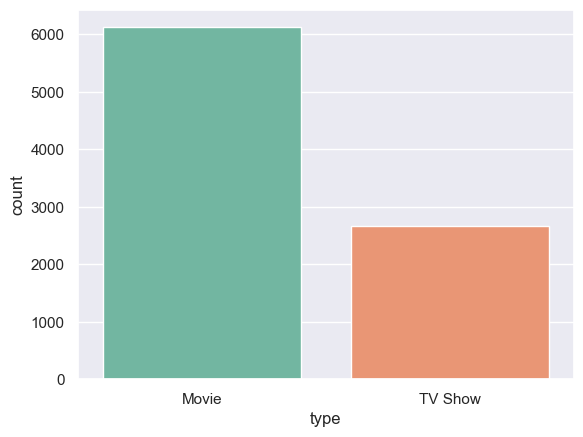

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

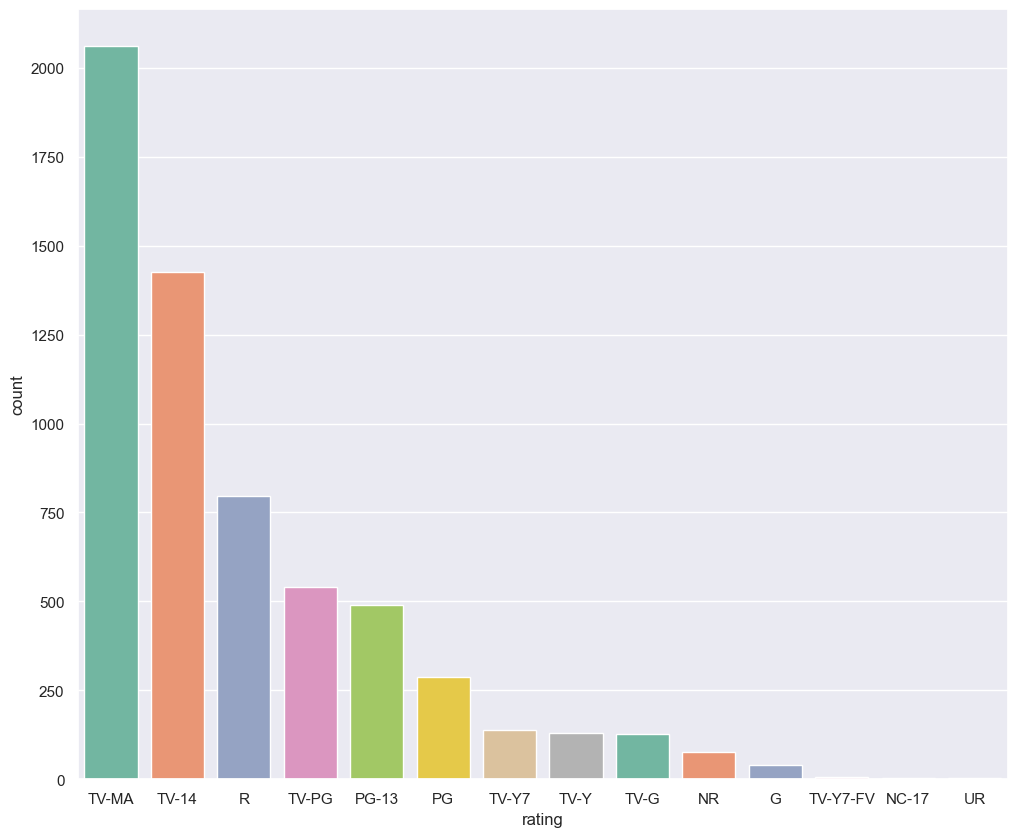

In [13]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

In [14]:
df.drop(columns=['show_id','title', 'cast', 'description'], inplace=True)

In [15]:
df.rename(columns={'listed_in' : 'category'}, inplace=True)

In [16]:
df.head()

,type,director,country,date_added,release_year,rating,duration,category
0,Movie,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,y,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,y,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,y,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [17]:
df.reset_index(drop=True)

,type,director,country,date_added,release_year,rating,duration,category
0,Movie,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,y,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,y,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,y,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...
8785,Movie,David Fincher,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8786,TV Show,y,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8787,Movie,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8788,Movie,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [19]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_23244\1147548429.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   director      8790 non-null   object        
 2   country       8790 non-null   object        
 3   date_added    8702 non-null   datetime64[ns]
 4   release_year  8790 non-null   int64         
 5   rating        8790 non-null   object        
 6   duration      8790 non-null   object        
 7   category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 618.0+ KB


In [21]:
types =  df['type'].value_counts()
types

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [22]:
types =  df['type'].value_counts()
types

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [23]:
top_10_directors_movie = df['director'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_movie

,director,count
0,y,187
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,15
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Youssef Chahine,12
9,Martin Scorsese,12


In [24]:
top_10_directors_TVShow = df['director'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_TVShow

,director,count
0,y,2434
1,Alastair Fothergill,3
2,Hsu Fu-chun,2
3,Shin Won-ho,2
4,Rob Seidenglanz,2
5,Ken Burns,2
6,Stan Lathan,2
7,Iginio Straffi,2
8,"Luis Alfaro, Javier Gómez Santander",1
9,"Mauricio Dias, Tatiana Villela",1


In [25]:
top_10_countries_movie = df['country'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_movie

,country,count
0,United States,2494
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Turkey,76
9,Japan,76


In [26]:
top_10_countries_TVShow = df['country'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_TVShow

,country,count
0,United States,1144
1,United Kingdom,212
2,Japan,167
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Spain,48
9,Australia,46


In [27]:
top_10_rating_movie = df['rating'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_rating_movie

,rating,count
0,TV-MA,2062
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


In [28]:
top_10_rating_tvshow = df['rating'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_rating_tvshow

,rating,count
0,TV-MA,1143
1,TV-14,730
2,TV-PG,321
3,TV-Y7,194
4,TV-Y,175
5,TV-G,94
6,NR,4
7,R,2
8,TV-Y7-FV,1


In [29]:
top_10_category_moive = df['category'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_category_moive

,category,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Children & Family Movies,215
6,"Children & Family Movies, Comedies",201
7,"Documentaries, International Movies",186
8,"Dramas, International Movies, Romantic Movies",180
9,"Comedies, International Movies",176


In [30]:
top_10_category_tvshow = df['category'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_category_tvshow

,category,count
0,Kids' TV,219
1,"International TV Shows, TV Dramas",121
2,"Crime TV Shows, International TV Shows, TV Dramas",110
3,"Kids' TV, TV Comedies",97
4,Reality TV,95
5,"International TV Shows, Romantic TV Shows, TV ...",94
6,"International TV Shows, Romantic TV Shows, TV ...",90
7,"Anime Series, International TV Shows",87
8,Docuseries,84
9,TV Comedies,68


In [31]:
df['date_added_year'] = df['date_added'].dt.year

In [43]:
df.head()

,type,director,country,date_added,release_year,rating,duration,category,date_added_year
0,Movie,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0
1,TV Show,No Data,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0
2,TV Show,Julien Leclercq,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0
3,TV Show,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0
4,TV Show,No Data,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0


In [32]:
date_added =  df['date_added_year'].value_counts()
date_added

date_added_year
2019.0    1999
2020.0    1878
2018.0    1624
2021.0    1498
2017.0    1161
2016.0     415
2015.0      73
2014.0      23
2011.0      13
2013.0      10
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

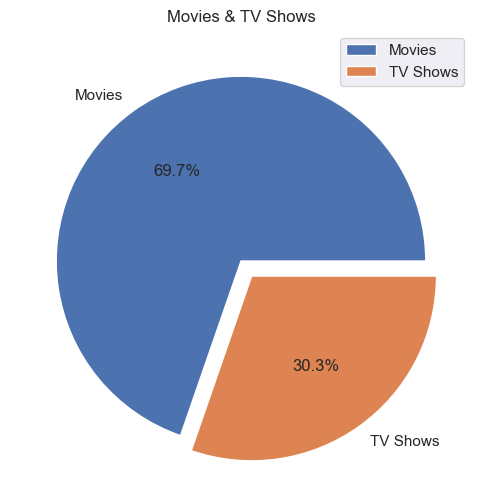

In [33]:
plt.figure(figsize=(10,6))
plt.pie(types ,labels=['Movies', 'TV Shows'], autopct='%1.1f%%', explode=[0,0.1])
plt.title('Movies & TV Shows')
plt.legend()
plt.show()

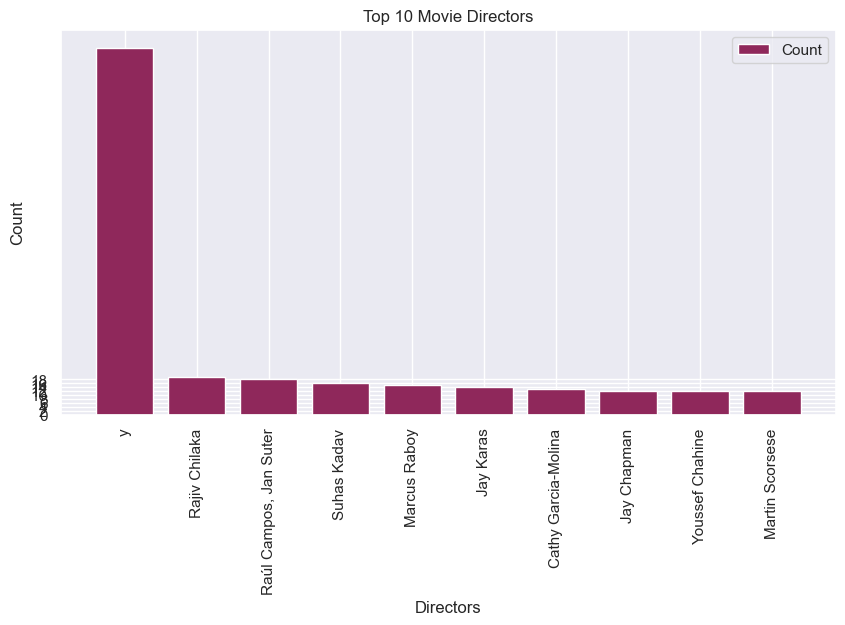

In [34]:
plt.figure(figsize=(10,5))
plt.bar(top_10_directors_movie['director'],top_10_directors_movie['count'], color = "#8f285b" , label='Count')
plt.title('Top 10 Movie Directors')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,20,2))
plt.legend()
plt.show()

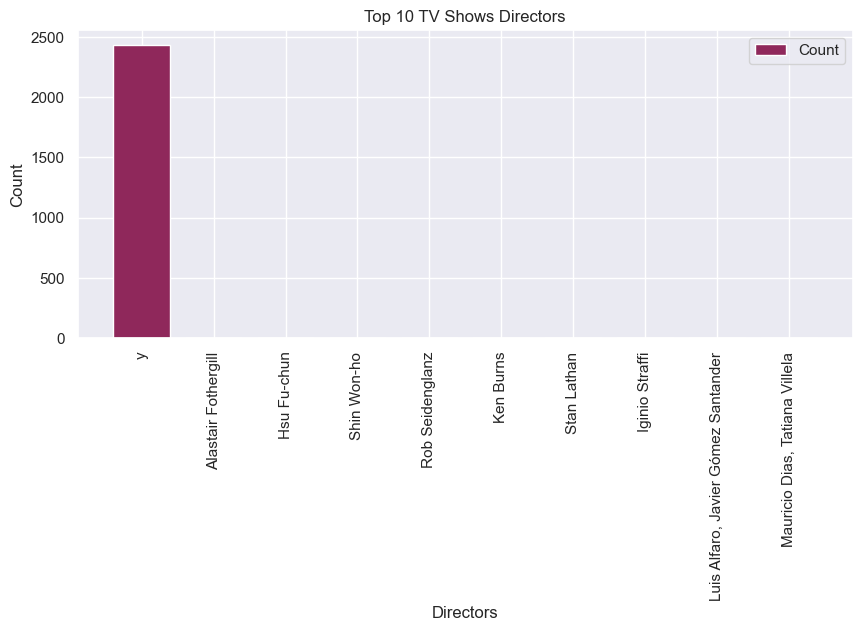

In [35]:
plt.figure(figsize=(10,4))
plt.bar(top_10_directors_TVShow['director'],top_10_directors_TVShow['count'], color = "#8f285b" , label='Count')
plt.title('Top 10 TV Shows Directors')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

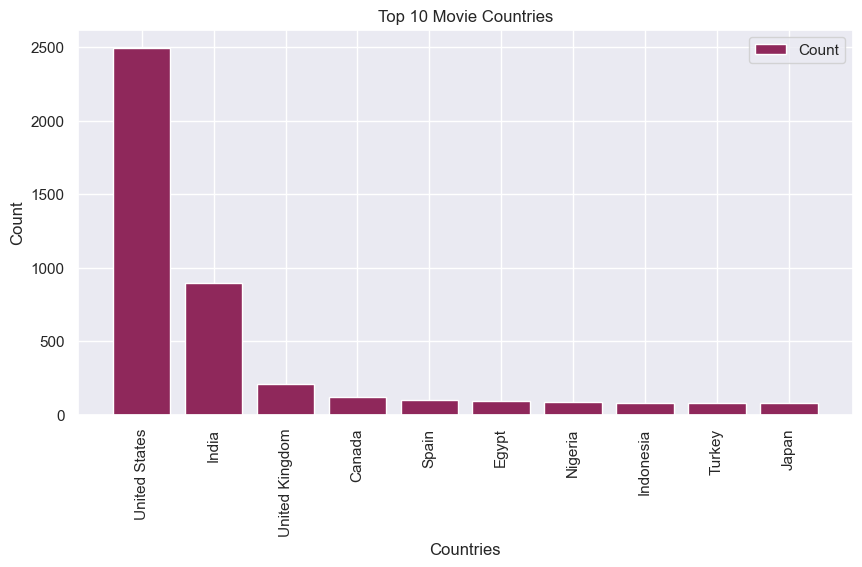

In [36]:
plt.figure(figsize=(10,5))
plt.bar(top_10_countries_movie['country'],top_10_countries_movie['count'], color = "#8f285b" , label='Count')
plt.title('Top 10 Movie Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

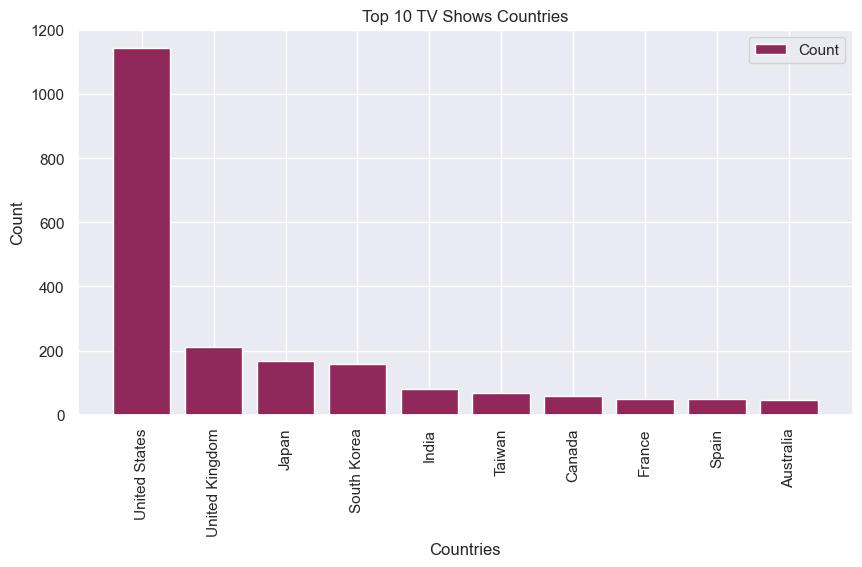

In [52]:
plt.figure(figsize=(10,5))
plt.bar(top_10_countries_TVShow['country'],top_10_countries_TVShow['count'], color = "#8f285b" , label='Count')
plt.title('Top 10 TV Shows Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

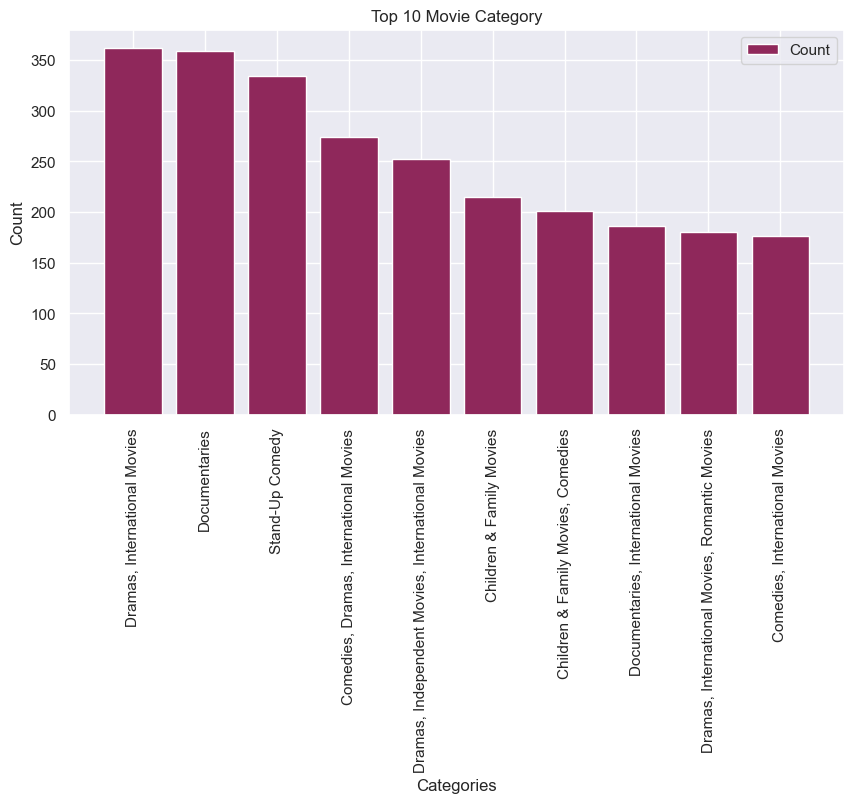

In [53]:
plt.figure(figsize=(10,5))
plt.bar(top_10_category_moive['category'],top_10_category_moive['count'], color = "#8f285b" , label='Count')
plt.title('Top 10 Movie Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

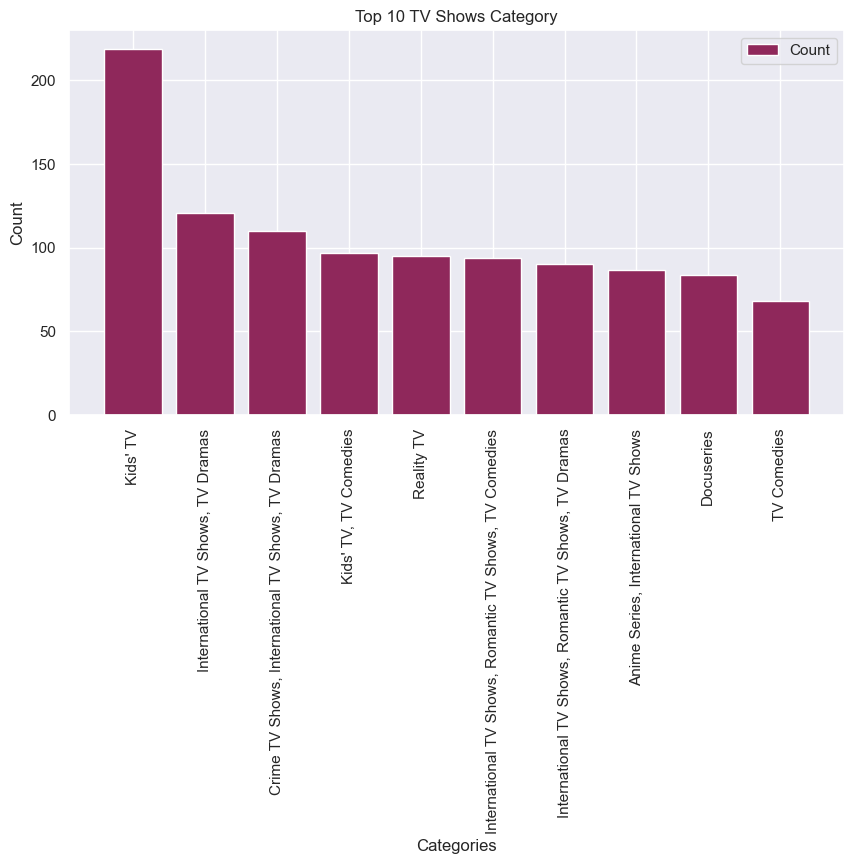

In [54]:
plt.figure(figsize=(10,5))
plt.bar(top_10_category_tvshow['category'],top_10_category_tvshow['count'], color = "#8f285b" , label='Count')
plt.title('Top 10 TV Shows Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

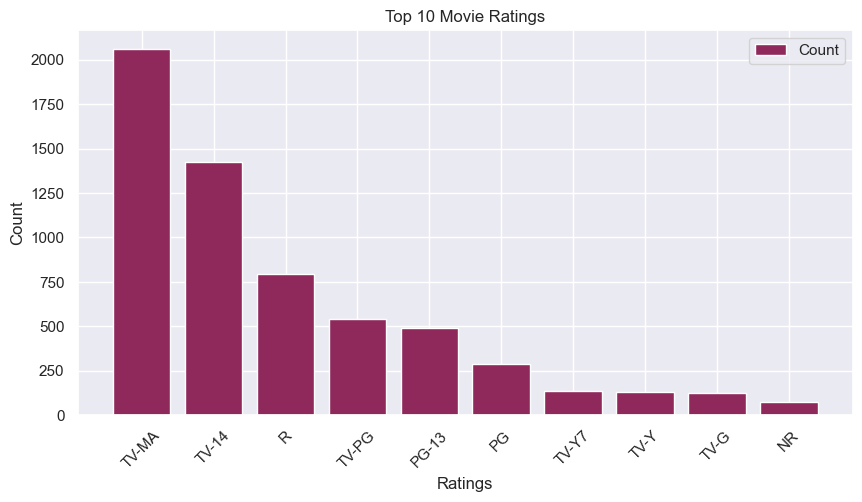

In [55]:
plt.figure(figsize=(10,5))
plt.bar(top_10_rating_movie['rating'],top_10_rating_movie['count'], color = "#8f285b" , label='Count')
plt.title('Top 10 Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

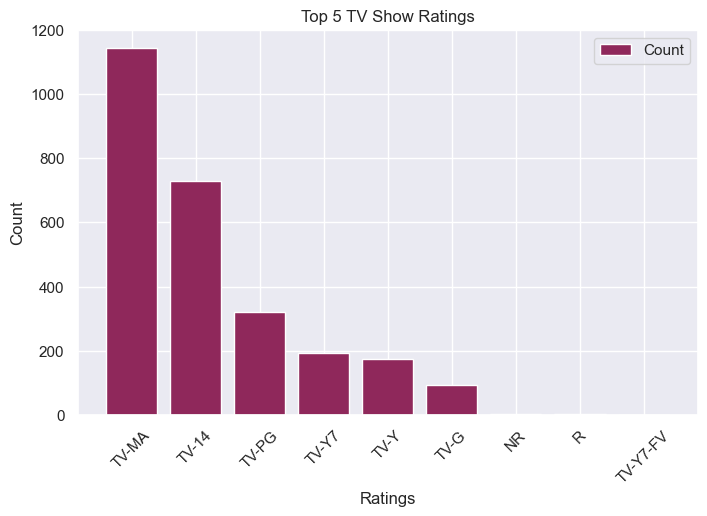

In [56]:
plt.figure(figsize=(8,5))
plt.bar(top_10_rating_tvshow['rating'],top_10_rating_tvshow['count'], color = "#8f285b" , label='Count')
plt.title('Top 5 TV Show Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

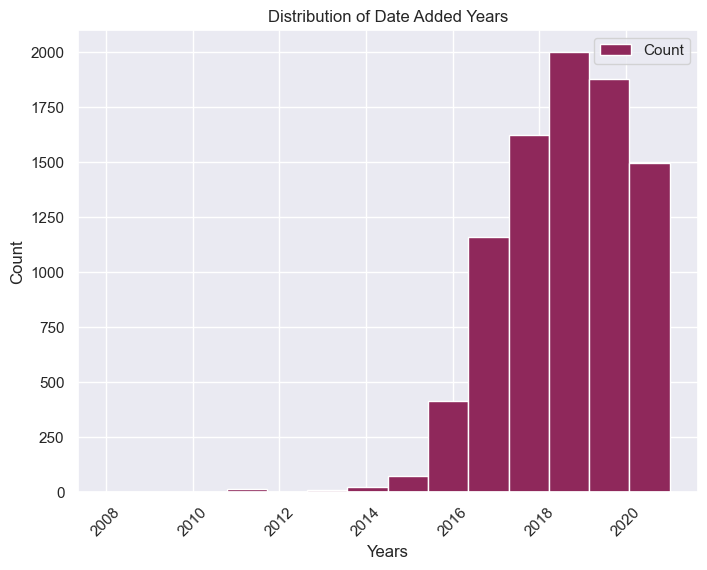

In [57]:
plt.figure(figsize=(8,6))
plt.hist(df['date_added_year'], bins=14, label='Count', color = "#8f285b" );
plt.grid(True)
plt.title('Distribution of Date Added Years')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


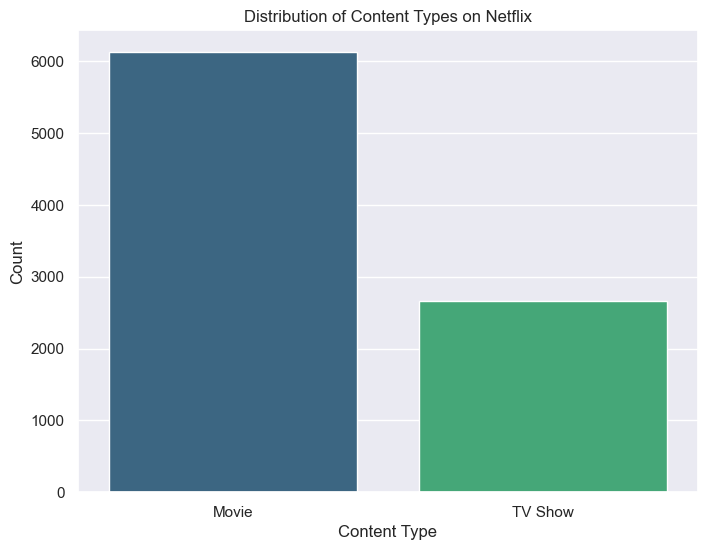

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

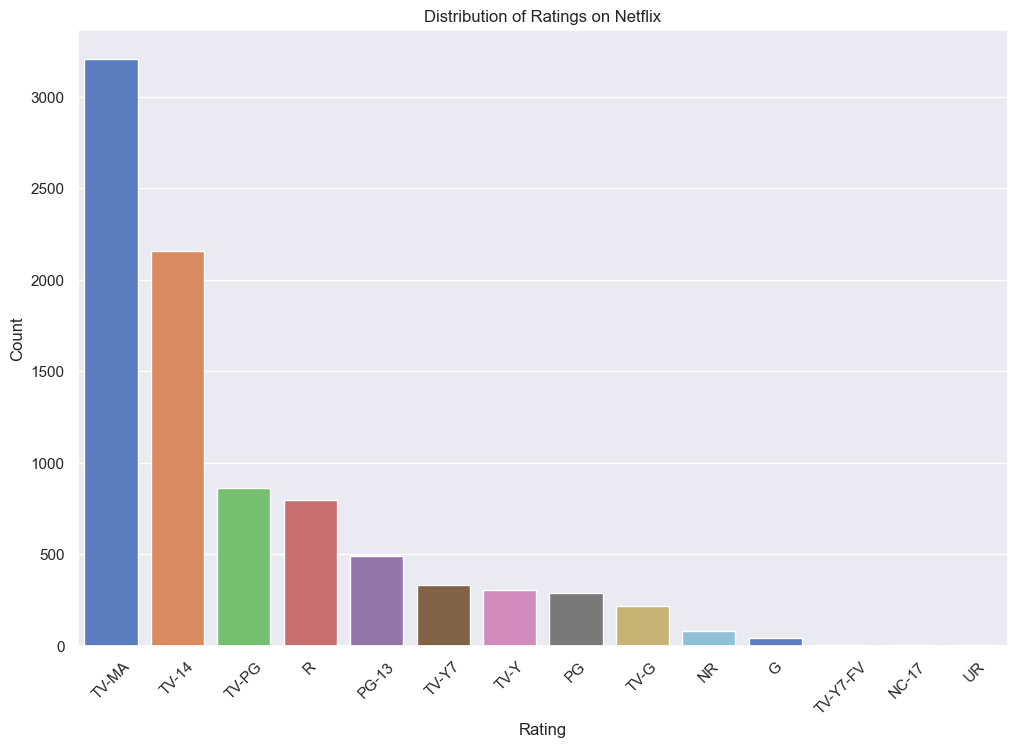

In [64]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, palette='muted', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

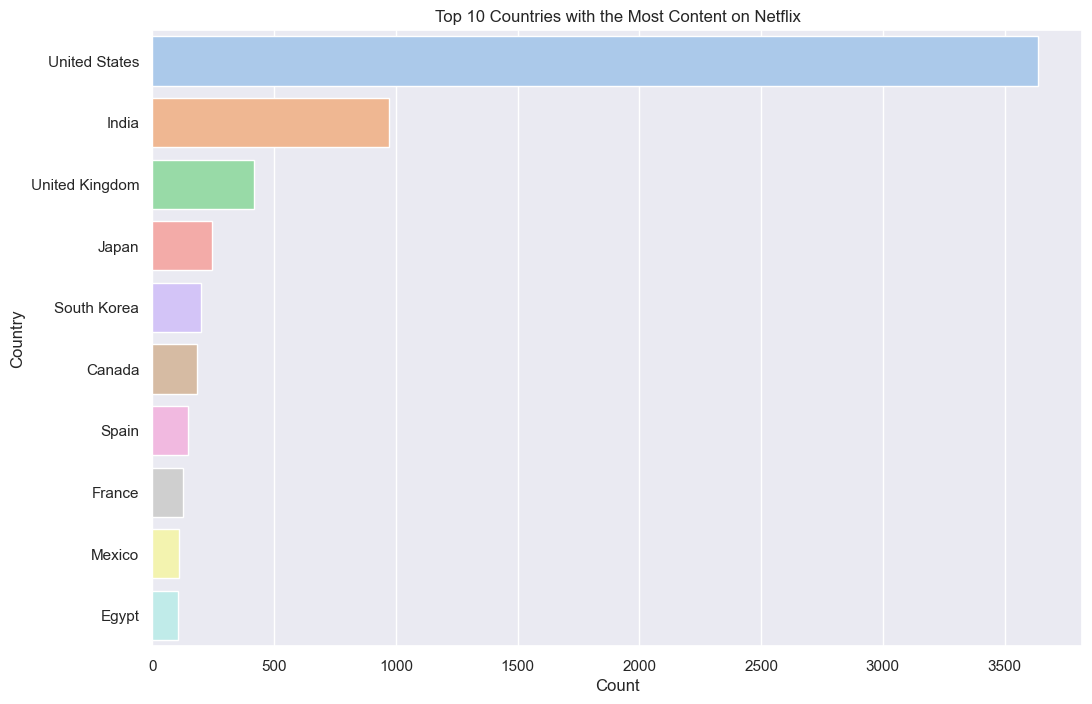

In [65]:
plt.figure(figsize=(12, 8))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='pastel')
plt.title('Top 10 Countries with the Most Content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

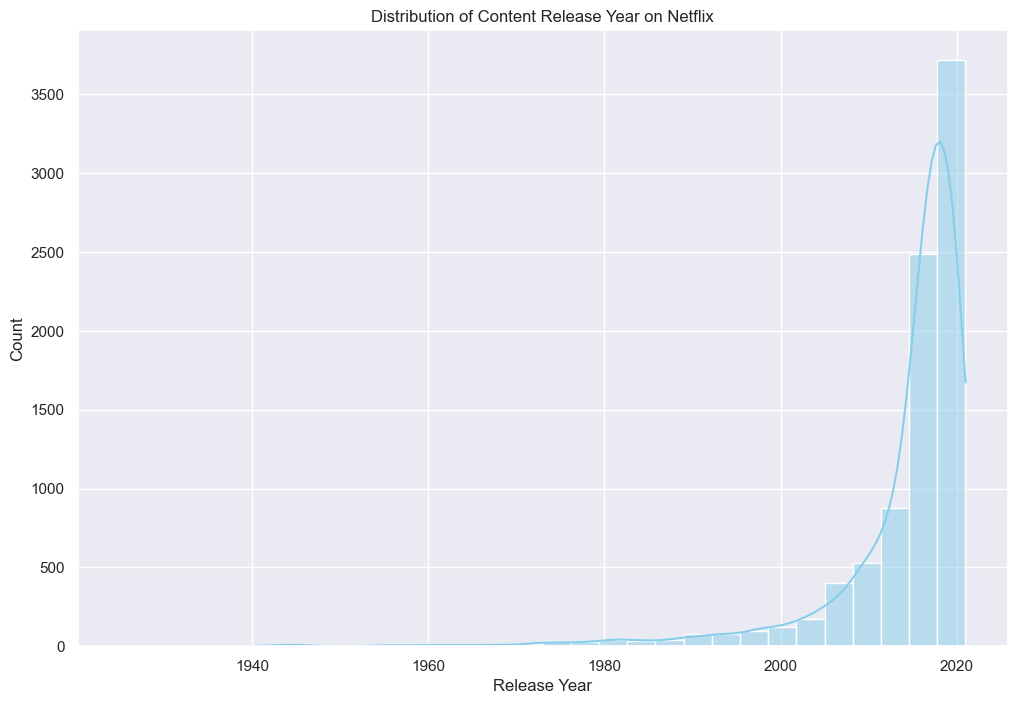

In [67]:
plt.figure(figsize=(12, 8))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Content Release Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

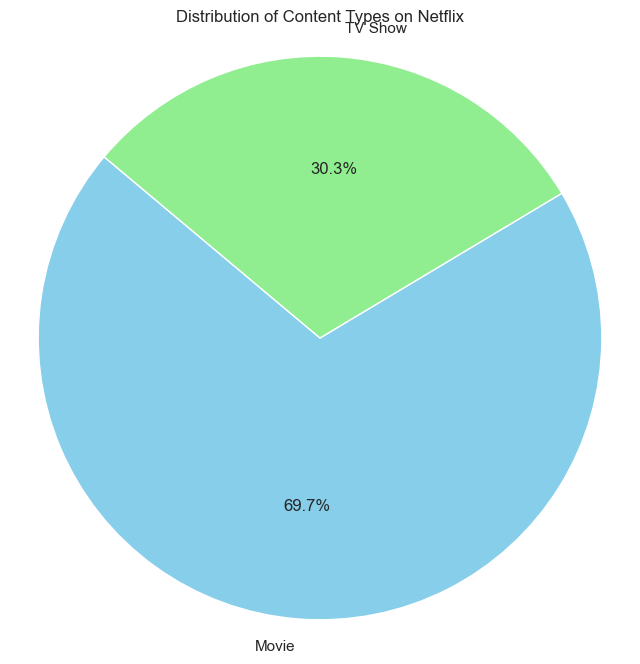

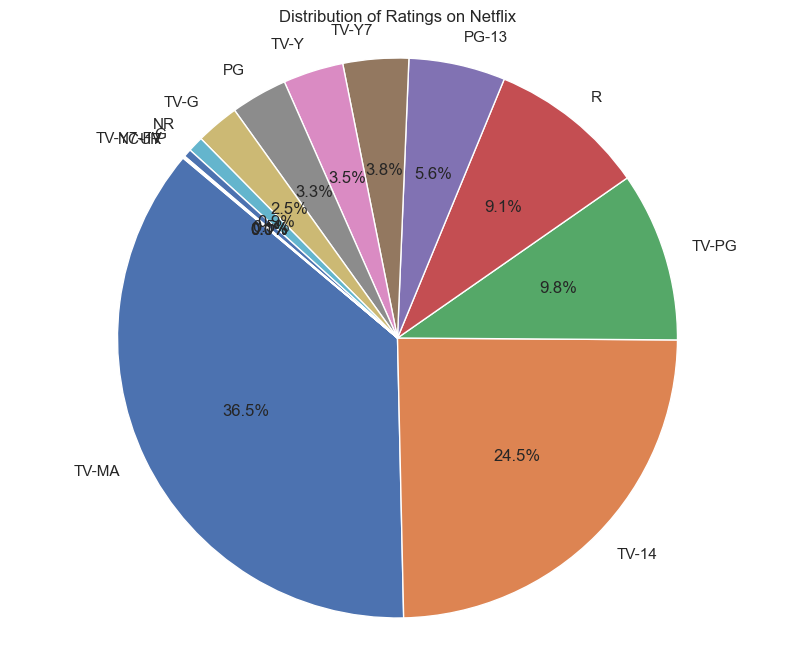

In [69]:
# Plot a pie chart for the distribution of content types (Movie or TV Show)
plt.figure(figsize=(8, 8))
content_type_counts = df['type'].value_counts()
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

# Plot a pie chart for the distribution of content ratings
plt.figure(figsize=(10, 8))
rating_counts = df['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings on Netflix')
plt.axis('equal')
plt.show()


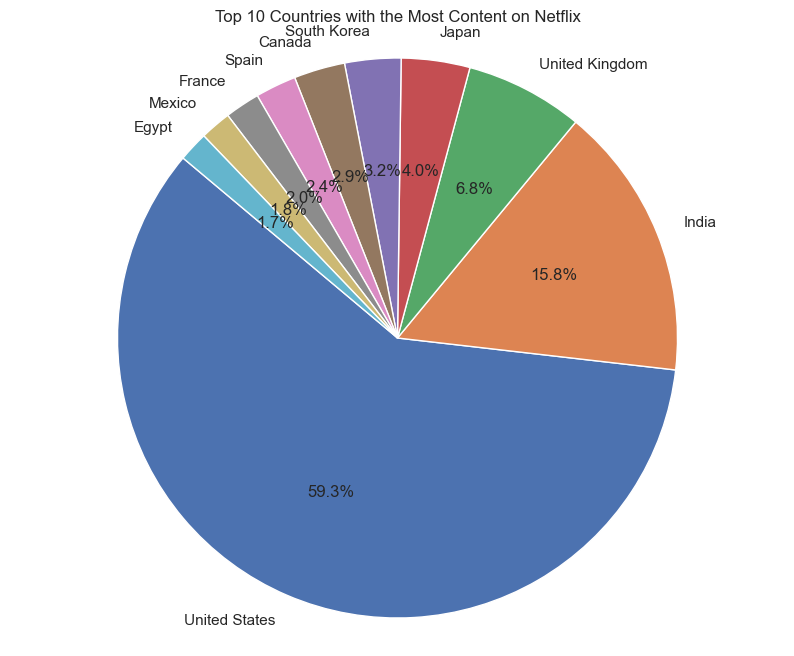

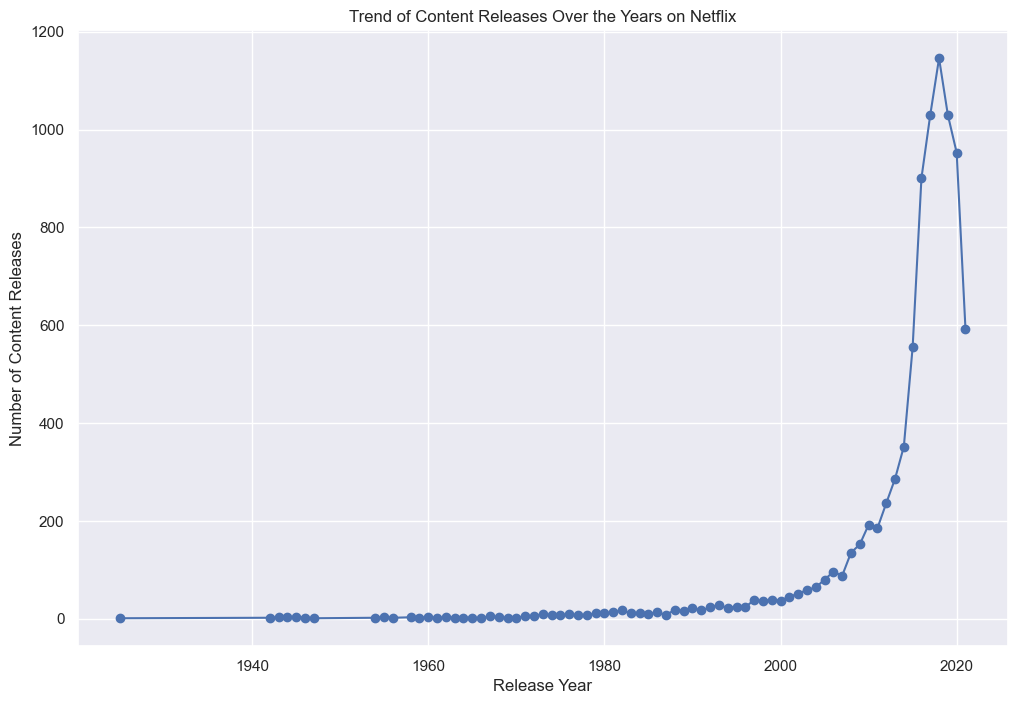

In [70]:
# Plot a pie chart for the distribution of top 10 countries with the most content on Netflix
plt.figure(figsize=(10, 8))
top_countries = df['country'].value_counts().head(10)
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries with the Most Content on Netflix')
plt.axis('equal')
plt.show()

# Plot a line plot for the trend of content releases over the years
plt.figure(figsize=(12, 8))
content_by_year =df['release_year'].value_counts().sort_index()
plt.plot(content_by_year.index, content_by_year.values, marker='o', linestyle='-')
plt.title('Trend of Content Releases Over the Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Content Releases')
plt.grid(True)
plt.show()


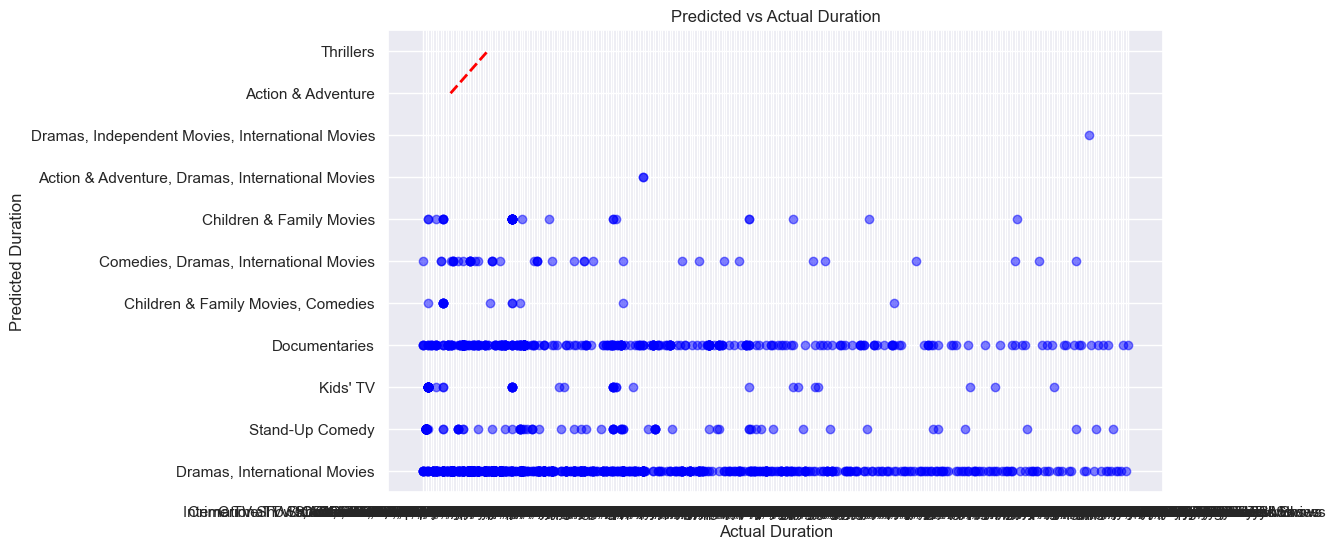

In [78]:
import matplotlib.pyplot as plt

# Plot predicted versus actual duration
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Duration')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.grid(True)
plt.show()


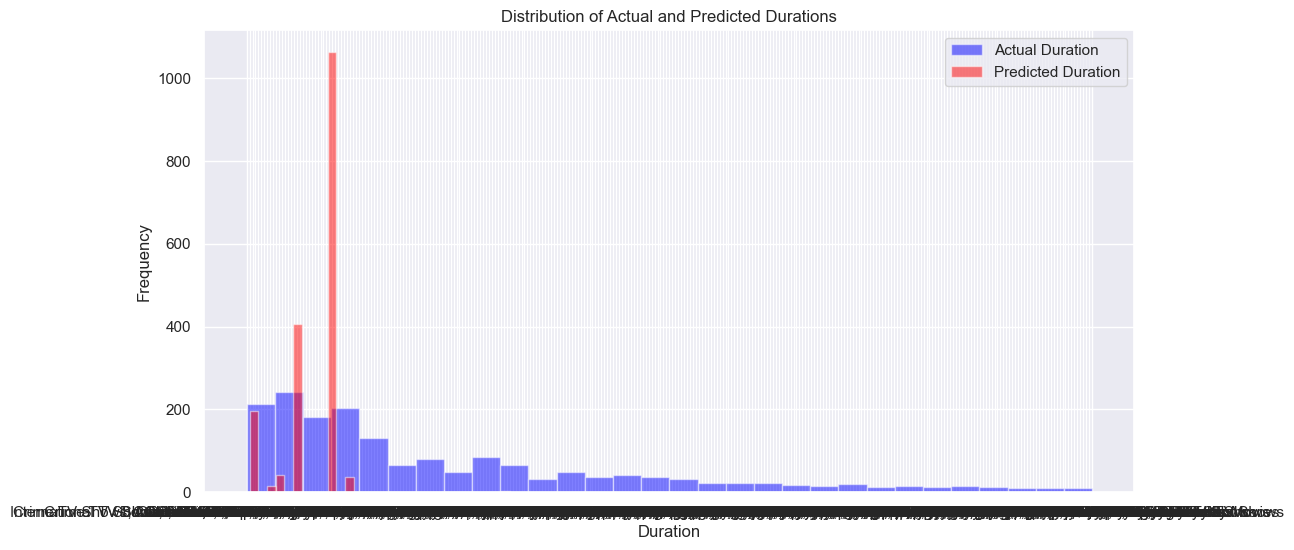

In [79]:
# Plot histograms of actual and predicted durations
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual Duration')
plt.hist(y_pred, bins=30, alpha=0.5, color='red', label='Predicted Duration')
plt.title('Distribution of Actual and Predicted Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
